# 01 Importing Libraries and Data and Renaming Columns

In [53]:
import pandas as pd
import numpy as np
import os
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib

In [54]:
df=pd.read_csv(r"C:\Users\eniad\Downloads\Achievement 6\02 Data\Original Data\US birth numbers.csv",index_col=False)

In [55]:
df.head()

,State,State Abbreviation,Year,Gender,Education Level of Mother,Education Level Code,Number of Births,Average Age of Mother (years),Average Birth Weight (g)
0,Alabama,AL,2016,F,8th grade or less,1,1052,27.8,3116.9
1,Alabama,AL,2016,F,9th through 12th grade with no diploma,2,3436,24.1,3040.0
2,Alabama,AL,2016,F,High school graduate or GED completed,3,8777,25.4,3080.0
3,Alabama,AL,2016,F,"Some college credit, but not a degree",4,6453,26.7,3121.9
4,Alabama,AL,2016,F,"Associate degree (AA, AS)",5,2227,28.9,3174.3


In [56]:
df.columns

Index(['State', 'State Abbreviation', 'Year', 'Gender',
       'Education Level of Mother', 'Education Level Code', 'Number of Births',
       'Average Age of Mother (years)', 'Average Birth Weight (g)'],
      dtype='object')

In [57]:
#Removing categorica columns
US_sub=df[[ 'Education Level Code', 'Number of Births','Average Age of Mother (years)', 'Average Birth Weight (g)']]

In [58]:
US_sub.head()

,Education Level Code,Number of Births,Average Age of Mother (years),Average Birth Weight (g)
0,1,1052,27.8,3116.9
1,2,3436,24.1,3040.0
2,3,8777,25.4,3080.0
3,4,6453,26.7,3121.9
4,5,2227,28.9,3174.3


In [59]:
df.shape

(5496, 9)

# 02 The elbow technique

In [60]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above

In [61]:
score = [kmeans[i].fit(US_sub).score(US_sub) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option

C:\Users\eniad\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\eniad\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\eniad\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\eniad\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\eniad\anaconda3\lib\site-packages\sklearn\clust

In [62]:
score

[-245789105028.41672,
 -100065781532.05894,
 -37447170252.910965,
 -19625936129.465866,
 -13706417795.107485,
 -9895588773.014244,
 -6607263397.018017,
 -5047463119.293302,
 -4138134376.41519]

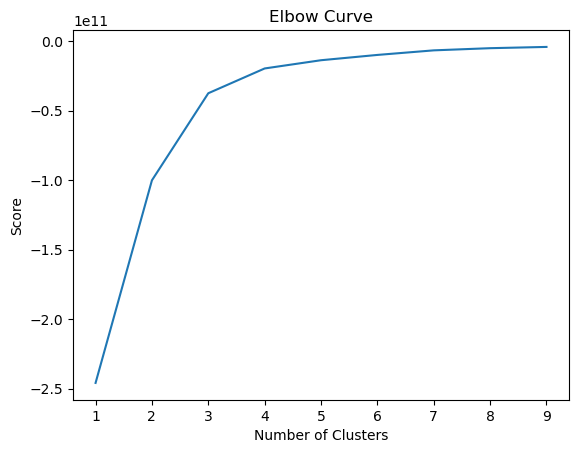

In [63]:
# Plot the elbow curve using PyLab.
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In this curve  there's a large jump from three to four on the x-axis, but after that, the curve straightens out. This means that the optimal count for the clusters is four."¶

# 3 K-means clustering

In [64]:
# Create the k-means objecT
    
kmeans = KMeans(n_clusters = 4) 

In [65]:
# Fit the k-means object to the data.\n",
kmeans.fit(US_sub)

C:\Users\eniad\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [66]:
US_sub['clusters'] = kmeans.fit_predict(US_sub)

C:\Users\eniad\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\eniad\AppData\Local\Temp\ipykernel_47412\4094625695.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  US_sub['clusters'] = kmeans.fit_predict(US_sub)


In [67]:
US_sub.head(10)

,Education Level Code,Number of Births,Average Age of Mother (years),Average Birth Weight (g),clusters
0,1,1052,27.8,3116.9,0
1,2,3436,24.1,3040.0,0
2,3,8777,25.4,3080.0,2
3,4,6453,26.7,3121.9,2
4,5,2227,28.9,3174.3,0
5,6,4453,30.3,3239.0,2
6,7,1910,32.0,3263.5,0
7,8,487,33.1,3196.7,0
8,-9,65,27.7,3083.9,0
9,1,1188,27.6,3232.9,0


In [68]:
US_sub['clusters'].value_counts()

0    3765
2    1192
3     454
1      85
Name: clusters, dtype: int64

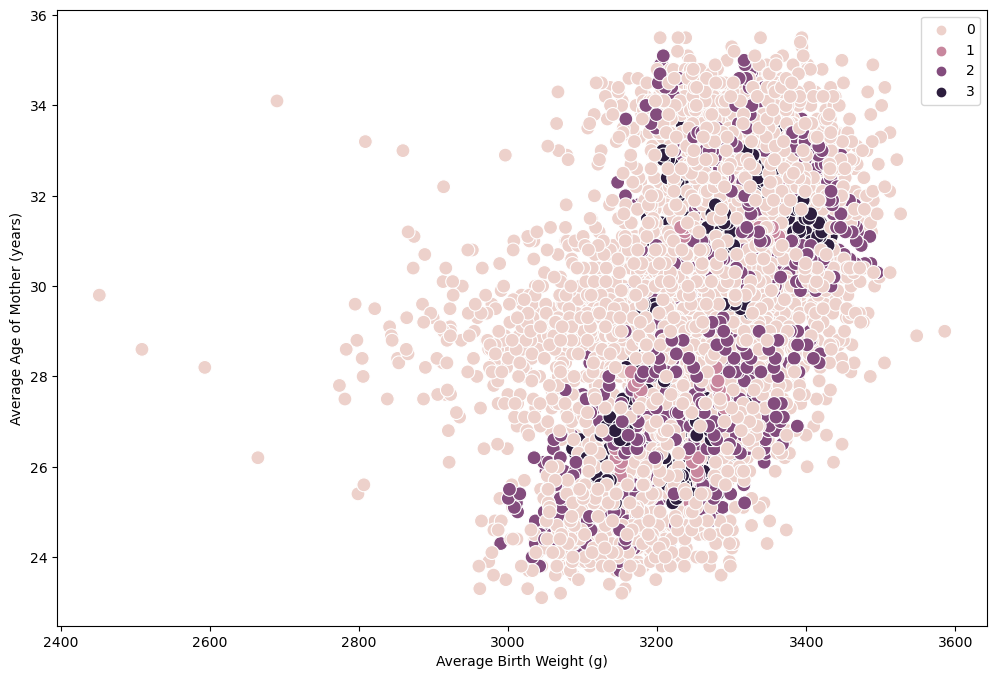

In [69]:
# Plot the clusters for the \"Average Birth Weight (g)\" and \"Average Age of Mother (years)\" variables
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=US_sub['Average Birth Weight (g)'], y=US_sub['Average Age of Mother (years)'], hue=kmeans.labels_, s=100)
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm
# `s` represents the size of the points you want to see in the plot   
ax.grid(False) # This removes the grid from the background
plt.xlabel('Average Birth Weight (g)') # Label x-axis
plt.ylabel('Average Age of Mother (years)') # Label y-axis
plt.show()

The first cluster is pink coded as '0'in the legend and is also the most populated cluster. It gather data points with very low Average birth weight (2500g) and relatively high average age of mother with the exclusion of extreme values at the bottom of the average birth weight. The others colour coded as '1','2' and '3' gather data points from 3000g of avearge birth weight with relatively high average age of mother


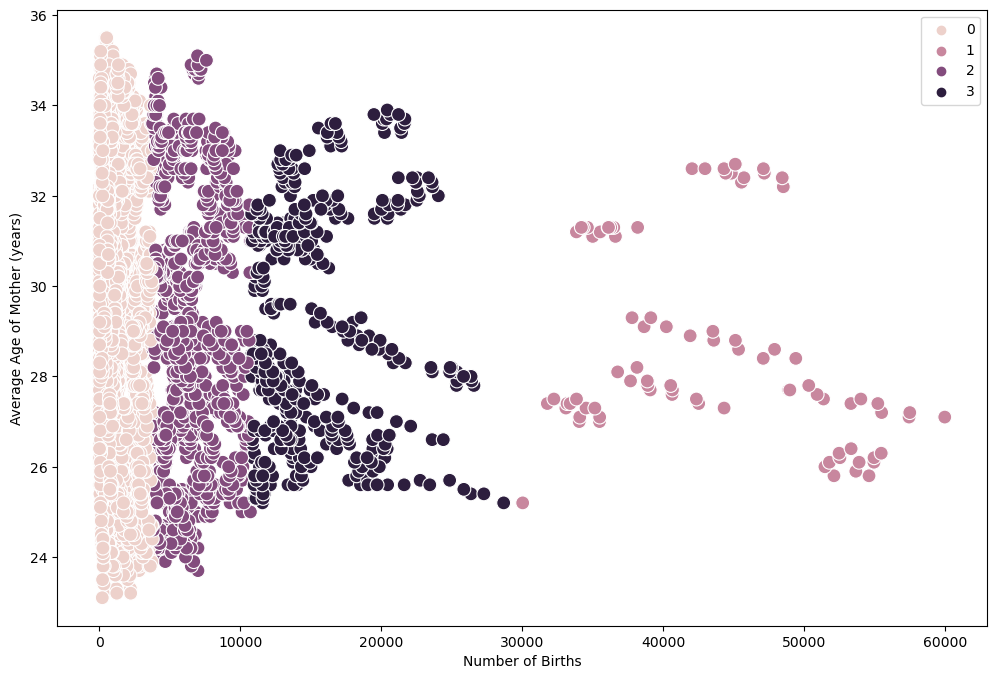

In [70]:
# Plot the clusters for the \"Number of Births\" and \"Average age of zmother\" 
 
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=US_sub['Number of Births'], y=US_sub['Average Age of Mother (years)'], hue=kmeans.labels_, s=100)
ax.grid(False)
plt.xlabel('Number of Births') 
plt.ylabel('Average Age of Mother (years)') 
plt.show()

The first cluster 'pink' coded as '0' has the lowest number of births with highest and lowest Average age of mother followed by 'light pink' with also relatively low number of births more than the 'pink' but also high average age of mother. While the medium purple coded as '2' has high number of biths more than the previuos two with relatively high avearege of mother. Lastly, the 'darkpurple' has the highest number of births with lowest average age of mnother. 

In [71]:
US_sub.loc[US_sub['clusters'] == 2, 'cluster'] = 'medium purple'
US_sub.loc[US_sub['clusters'] == 1, 'cluster'] = 'light pink'
US_sub.loc[US_sub['clusters'] == 0, 'cluster'] = 'pink'
US_sub.loc[US_sub['clusters'] == 3, 'cluster'] ='dark purple'

C:\Users\eniad\AppData\Local\Temp\ipykernel_47412\4181359625.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  US_sub.loc[US_sub['clusters'] == 2, 'cluster'] = 'medium purple'


In [72]:
US_sub.head()

,Education Level Code,Number of Births,Average Age of Mother (years),Average Birth Weight (g),clusters,cluster
0,1,1052,27.8,3116.9,0,pink
1,2,3436,24.1,3040.0,0,pink
2,3,8777,25.4,3080.0,2,medium purple
3,4,6453,26.7,3121.9,2,medium purple
4,5,2227,28.9,3174.3,0,pink


In [73]:
US_sub.groupby('cluster').agg({'Number of Births':['mean', 'median'],
                            'Average Age of Mother (years)':['mean', 'median'],
                            'Average Birth Weight (g)':['mean', 'median'],
                            'Education Level Code':['mean', 'median']})

Number of Births          Average Age of Mother (years)         \
                          mean   median                          mean median   
cluster                                                                        
dark purple       15215.328194  13838.5                     29.085242   28.5   
light pink        43466.529412  42965.0                     28.694118   27.8   
medium purple      6368.929530   6070.0                     29.049497   29.0   
pink               1175.113413    904.0                     29.787145   29.8   

              Average Birth Weight (g)         Education Level Code         
                                  mean  median                 mean median  
cluster                                                                     
dark purple                3253.646256  3251.5             4.044053    4.0  
light pink                 3255.071765  3247.3             4.117647    4.0  
medium purple              3262.248909  3265.0             4.496644    4.0  
pink                       3246.863533  3254.3             2.413280    4.0



## i. The dark purple cluster has the best statistics in almost all the categories. It has median number of births around 42965 which is larger than the other three and also lowest avearge birth weight.
## ii. According to the average age of mother, the 'pink' has the highest median compared to other 3
## iii. Based on the Average birth weight, the 'light pink' has the hughest median more than the other 3
## iv.  Finally, all the cluster have the same median on Education level code